In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
import healpy as hp

In [4]:
# This program reads and interpolates a LIGO-Virgo skymap
# Requires "healpy" installation
# We have used a Bayestar skymap from the mock data challenge, visible here
# http://www.ligo.caltech.edu/~rwilliam/skymapViewer/aladin/index.html#F2Y:938672
# and here http://www.ligo.org/scientists/first2years/#938672
# Questions roy.williams@ligo.org 
# LIGO Caltech, 2015

import healpy, math
radian = 180/math.pi

filename = 'LALInference_v2.fits'
map,header = healpy.read_map(filename, h=True)

print("Healpix file has nside = ", healpy.get_nside(map))
# for h in header: print h[0], h[1]

def interp_healpix(map, ra, dec):
    # convert to Healpix coordinates
    # ra: right ascension in degrees
    # dec: declination in degrees
    th = (90-dec)/radian   # codeclination in radians
    ph = ra/radian         # maps 24 hours = 360 degrees to 2*pi

    # interpolate at the given point
    return healpy.pixelfunc.get_interp_val(map, th, ph)

# near peak of largest bump
print ("Big peak", interp_healpix(map, 278.335, 60.293) * 1.e6)

# near peak of second largest bump
print ("Second peak", interp_healpix(map, 258.659, 64.800) * 1.e6)
# location of likely galaxy PGC063313 at 56 Mpc
print ("Likely galaxy", interp_healpix(map, 292.7929, 54.0924)* 1.e6)




NSIDE = 1024
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
Healpix file has nside =  1024
Big peak 0.0
Second peak 0.0
Likely galaxy 0.0


In [5]:
NSIDE = 32
print(
    "Approximate resolution at NSIDE {} is {:.2} deg".format(
        NSIDE, healpy.nside2resol(NSIDE, arcmin=True) / 60
    )
)

Approximate resolution at NSIDE 32 is 1.8 deg


In [6]:
NPIX = hp.nside2npix(NSIDE)
print(NPIX)

12288


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


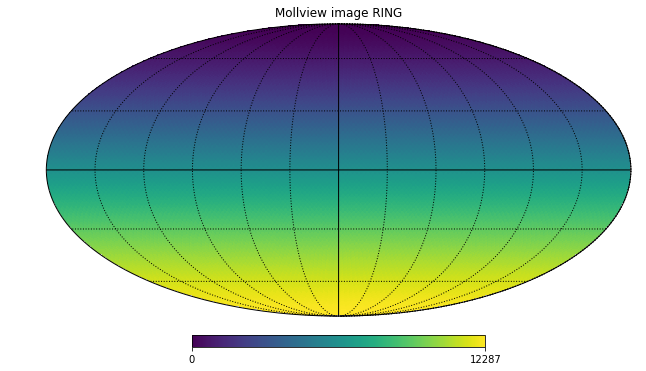

In [7]:
m = np.arange(NPIX)
hp.mollview(m, title="Mollview image RING")
hp.graticule()

In [8]:
vec = hp.ang2vec(np.pi / 2, np.pi * 3 / 4)
print(vec)

[-7.07106781e-01  7.07106781e-01  6.12323400e-17]


In [9]:
ipix_disc = hp.query_disc(nside=32, vec=vec, radius=np.radians(10))

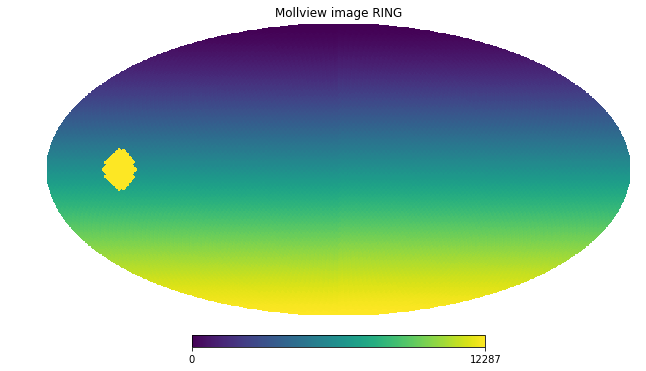

In [10]:
m = np.arange(NPIX)
m[ipix_disc] = m.max()
hp.mollview(m, title="Mollview image RING")

In [11]:
theta, phi = np.degrees(hp.pix2ang(nside=32, ipix=[0, 1, 2, 3, 4]))

In [12]:
theta

array([1.46197116, 1.46197116, 1.46197116, 1.46197116, 2.92418036])

In [13]:
phi

array([ 45. , 135. , 225. , 315. ,  22.5])

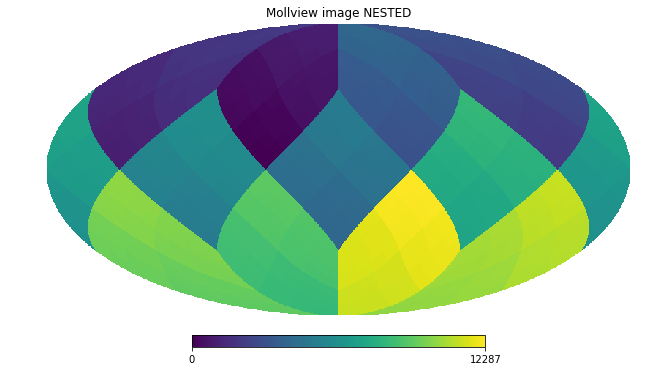

In [14]:
m = np.arange(NPIX)
hp.mollview(m, nest=True, title="Mollview image NESTED")

In [16]:
wmap_map_I = hp.read_map("wmap_band_iqumap_r9_7yr_W_v4.fits")

NSIDE = 512
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT


/Users/kalgi/anaconda3/lib/python3.7/site-packages/healpy/fitsfunc.py:371: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  warnings.warn("No INDXSCHM keyword in header file : " "assume {}".format(schm))


Ordering converted to RING


In [17]:
hp.write_map("my_map.fits", wmap_map_I, overwrite=True)

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


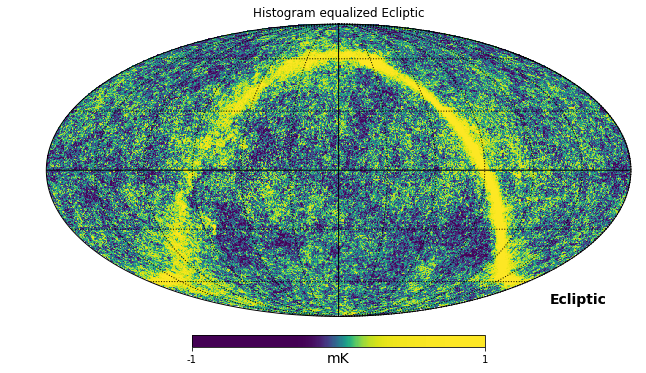

In [18]:
hp.mollview(
    wmap_map_I,
    coord=["G", "E"],
    title="Histogram equalized Ecliptic",
    unit="mK",
    norm="hist",
    min=-1,
    max=1,
)
hp.graticule()

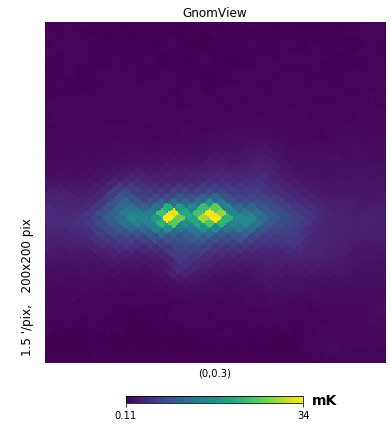

In [19]:
hp.gnomview(wmap_map_I, rot=[0, 0.3], title="GnomView", unit="mK", format="%.2g")

In [20]:
mask = hp.read_map("wmap_temperature_analysis_mask_r9_7yr_v4.fits").astype(np.bool)
wmap_map_I_masked = hp.ma(wmap_map_I)
wmap_map_I_masked.mask = np.logical_not(mask)

NSIDE = 512
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


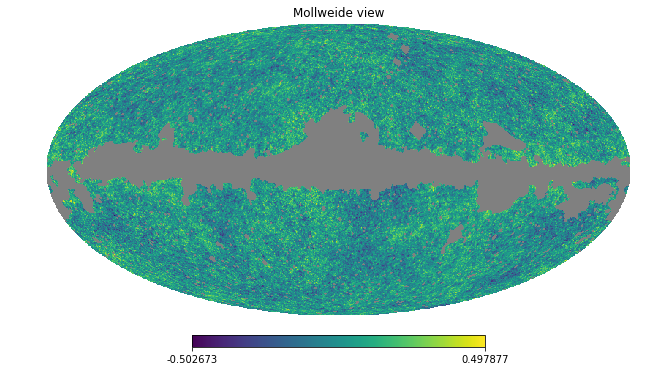

In [21]:
hp.mollview(wmap_map_I_masked.filled())

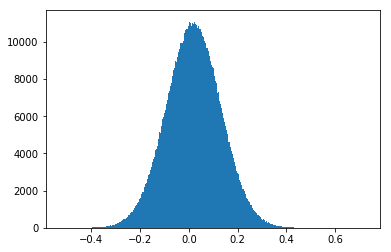

In [22]:
plt.hist(wmap_map_I_masked.compressed(), bins=1000);

In [23]:
LMAX = 1024
cl = hp.anafast(wmap_map_I_masked.filled(), lmax=LMAX)
ell = np.arange(len(cl))

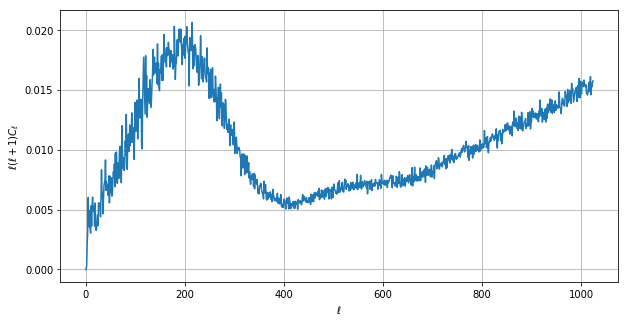

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(ell, ell * (ell + 1) * cl)
plt.xlabel("$\ell$")
plt.ylabel("$\ell(\ell+1)C_{\ell}$")
plt.grid()
hp.write_cl("cl.fits", cl, overwrite=True)

Sigma is 25.479654 arcmin (0.007412 rad) 
-> fwhm is 60.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


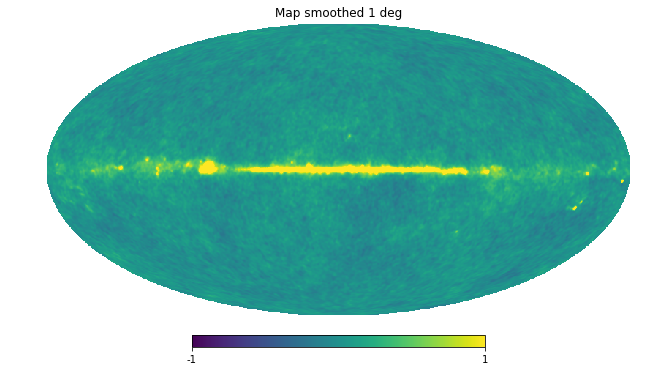

In [25]:
wmap_map_I_smoothed = hp.smoothing(wmap_map_I, fwhm=np.radians(1.))
hp.mollview(wmap_map_I_smoothed, min=-1, max=1, title="Map smoothed 1 deg")